In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.transforms as mtrans
import seaborn as sns

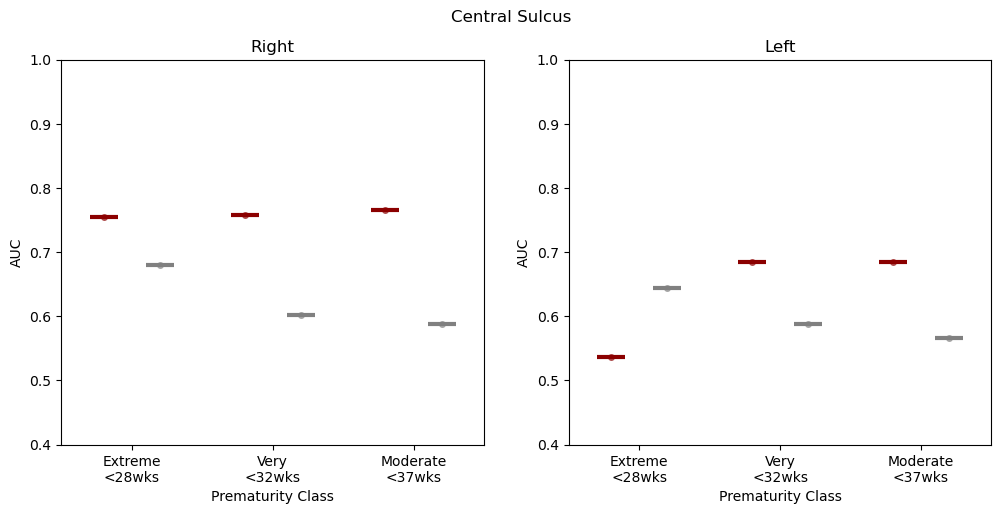

In [34]:
#models = ['SimCLR', 'BetaVAE']
model = 'BetaVAE' # first BetaVAE, then add SimCLR

regions = {'S.C.babies': 'Central Sulcus'} # loop over regions after
sides = {'R': 'Right', 'L': 'Left'}
output_dir = '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/BetaVAE/' # just need to change this directory if the global config were to change. For example latent space size...
thresholds={'28': 'Extreme\n<28wks', '32': 'Very\n<32wks', '37': 'Moderate\n<37wks'}
palette={'True': 'darkred',
         'Shuffled': 'gray'}

for region, region_name in regions.items():

    fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
    for i, (side, side_name) in enumerate(sides.items()):
        ax=axs[i]
        #initialize dict to plot
        dict_perf = {threshold: {'True': [], 'Shuffled': []} for threshold in thresholds.keys()}

        models_dirs = output_dir + '/' + region + '/' + side + '/'
        selected_models_dirs = [root for root, dirs, files in os.walk(models_dirs)
                                if ('SVC.csv' in files) & ('SVC_random_permutations.csv' in files)]
        for directory in selected_models_dirs:

            perf_dir = directory + '/SVC.csv'
            perf = pd.read_csv(perf_dir)
            cols = ['metric', perf.columns[1], perf.columns[2], perf.columns[3]]
            perf.columns=cols

            random_perf_dir = directory + '/SVC_random_permutations.csv'
            rd_perf = pd.read_csv(random_perf_dir)
            cols = ['metric', rd_perf.columns[1], rd_perf.columns[2], rd_perf.columns[3]]
            rd_perf.columns=cols

            for k, threshold in enumerate(thresholds.keys()):
                auc = perf.loc[perf['metric']=='AUC'][threshold].tolist()[0],
                thresh_95 = rd_perf.loc[rd_perf['metric']=='95th percentile'][threshold].tolist()[0]
                dict_perf[threshold]['True'].append(auc[0])
                dict_perf[threshold]['Shuffled'].append(thresh_95)
        # reformat dict_perf to flatten lists in lines
        cols = ['Prematurity Class', 'Labels', 'AUC']
        df = pd.DataFrame([[k1, k2, elem] for k1, v1 in dict_perf.items() for k2, list_val in v1.items() for elem in list_val], columns=cols)
        for key, value in thresholds.items():
            df.replace(key, value, inplace=True)
        sns.stripplot(
        data=df, x="Prematurity Class", y="AUC", hue="Labels",
        dodge=True, alpha=.7, legend=False,
        palette=palette, ax=ax
        )
        sns.pointplot(
            data=df, x="Prematurity Class", y="AUC", hue="Labels",
            dodge=.4, linestyle="none", errorbar=None,
            marker="_", markersize=20, markeredgewidth=3,
            legend=False, palette=palette, ax=ax
        )
        ax.set_title(side_name)
        ax.set_ylim(0.4, 1)
    plt.suptitle(region_name)
plt.show()

In [ ]:
# Pour le 95ème percentile: fait-on une moyenne ou bien met-on les 5 valeurs ? A ce moment là il faut préciser que c'est la distribution des 95ème percentile de chaque modèle...
# save dans Output/Sulcus/side ? Ou ailleurs